<a href="https://colab.research.google.com/github/Mugheerik/cnn_project/blob/main/CIFAR100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT LIBRARIES**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



# **LOAD DATASET (CIFAR100)**

In [2]:

# Load CIFAR-100 dataset
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

# Normalize pixel values to between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode labels
train_labels = to_categorical(train_labels, 100)
test_labels = to_categorical(test_labels, 100)



169001437/169001437 [==============================] - 2s 0us/step


# **DATA AUGMENTATION**

In [3]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(train_images)



# **CNN MODEL**

In [4]:
# Build CNN Model with Dropout and Batch Normalization
model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation='softmax'))

# Compile the model with a reduced learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Learning Rate Reduction and Early Stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



# **TRAIN MODEL**

In [5]:
# Train the model
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    steps_per_epoch=len(train_images) / 32, epochs=20,
                    validation_data=(test_images, test_labels),
                    callbacks=[reduce_lr, early_stop])



Epoch 1/20
1562/1562 [==============================] - 647s 412ms/step - loss: 4.0995 - accuracy: 0.0859 - val_loss: 3.6658 - val_accuracy: 0.1489 - lr: 0.0050
Epoch 2/20
1562/1562 [==============================] - 595s 381ms/step - loss: 3.5898 - accuracy: 0.1475 - val_loss: 3.1425 - val_accuracy: 0.2256 - lr: 0.0050
Epoch 3/20
1562/1562 [==============================] - 579s 371ms/step - loss: 3.3625 - accuracy: 0.1850 - val_loss: 2.9872 - val_accuracy: 0.2623 - lr: 0.0050
Epoch 4/20
1562/1562 [==============================] - 565s 362ms/step - loss: 3.1925 - accuracy: 0.2172 - val_loss: 2.7232 - val_accuracy: 0.3044 - lr: 0.0050
Epoch 5/20
1562/1562 [==============================] - 597s 382ms/step - loss: 3.0677 - accuracy: 0.2399 - val_loss: 2.6181 - val_accuracy: 0.3267 - lr: 0.0050
Epoch 6/20
1562/1562 [==============================] - 596s 381ms/step - loss: 2.9705 - accuracy: 0.2582 - val_loss: 2.5073 - val_accuracy: 0.3555 - lr: 0.0050
Epoch 7/20
1562/1562 [============

# **EVALUATE MODEL**

In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')



313/313 - 36s - loss: 2.1032 - accuracy: 0.4494 - 36s/epoch - 116ms/step
Test accuracy: 0.44940000772476196


# **SAVE MODEL**

In [7]:
# Save the model
model.save('cifar100_model.h5')



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **PLOT GRAPH**

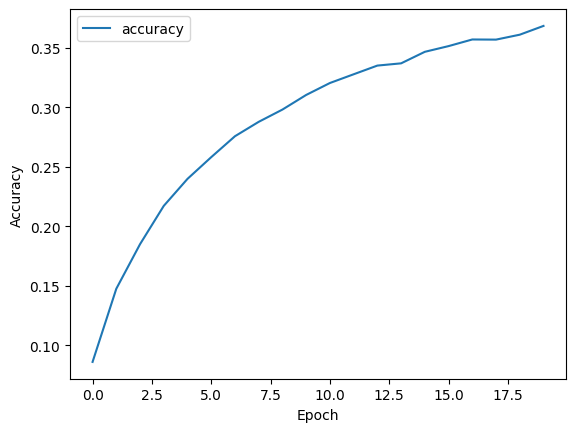

In [9]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **DEPLOY**

In [11]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
from io import BytesIO
import requests
import numpy as np

# Load the model
model = load_model('cifar100_model.h5')

# Map class index to labels
class_labels = {
    0: 'apple',
    1: 'aquarium_fish',
    2: 'baby',
    3: 'bear',
    4: 'beaver',
    5: 'bed',
    6: 'bee',
    7: 'beetle',
    8: 'bicycle',
    9: 'bottle',
    10: 'bowl',
    11: 'boy',
    12: 'bridge',
    13: 'bus',
    14: 'butterfly',
    15: 'camel',
    16: 'can',
    17: 'castle',
    18: 'caterpillar',
    19: 'cattle',
    20: 'chair',
    21: 'chimpanzee',
    22: 'clock',
    23: 'cloud',
    24: 'cockroach',
    25: 'couch',
    26: 'crab',
    27: 'crocodile',
    28: 'cup',
    29: 'dinosaur',
    30: 'dolphin',
    31: 'elephant',
    32: 'flatfish',
    33: 'forest',
    34: 'fox',
    35: 'girl',
    36: 'hamster',
    37: 'house',
    38: 'kangaroo',
    39: 'keyboard',
    40: 'lamp',
    41: 'lawn_mower',
    42: 'leopard',
    43: 'lion',
    44: 'lizard',
    45: 'lobster',
    46: 'man',
    47: 'maple_tree',
    48: 'motorcycle',
    49: 'mountain',
    50: 'mouse',
    51: 'mushroom',
    52: 'oak_tree',
    53: 'orange',
    54: 'orchid',
    55: 'otter',
    56: 'palm_tree',
    57: 'pear',
    58: 'pickup_truck',
    59: 'pine_tree',
    60: 'plain',
    61: 'plate',
    62: 'poppy',
    63: 'porcupine',
    64: 'possum',
    65: 'rabbit',
    66: 'raccoon',
    67: 'ray',
    68: 'road',
    69: 'rocket',
    70: 'rose',
    71: 'sea',
    72: 'seal',
    73: 'shark',
    74: 'shrew',
    75: 'skunk',
    76: 'skyscraper',
    77: 'snail',
    78: 'snake',
    79: 'spider',
    80: 'squirrel',
    81: 'streetcar',
    82: 'sunflower',
    83: 'sweet_pepper',
    84: 'table',
    85: 'tank',
    86: 'telephone',
    87: 'television',
    88: 'tiger',
    89: 'tractor',
    90: 'train',
    91: 'trout',
    92: 'tulip',
    93: 'turtle',
    94: 'wardrobe',
    95: 'whale',
    96: 'willow_tree',
    97: 'wolf',
    98: 'woman',
    99: 'worm'
}

def preprocess_image_from_url(image_url):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    img = img.resize((32, 32))  # Resize to match the model's expected input size
    img_array = np.asarray(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

In [15]:
image_url = 'https://images.unsplash.com/photo-1592009309602-1dde752490ae?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&w=1000&q=80'
# Preprocess the image
input_image = preprocess_image_from_url(image_url)

# Make predictions
predictions = model.predict(input_image)
predicted_class = np.argmax(predictions[0])
predicted_label = class_labels[predicted_class]

print(f'The predicted class is: {predicted_label}')

1/1 [==============================] - 0s 31ms/step
The predicted class is: man
